In [1]:
""" 
Reading saved data,
once DataFrame is read we modify it -
we change column names, modify time format, and add bus_stop_id 
"""

from Data_reading.reading import give_modified_bus_stops_df
from Data_reading.reading import give_modified_lines_stops_df
from Data_reading.reading import give_modified_curr_positions_df
from Data_reading.reading import give_modified_time_tables_df

bus_stops_df = give_modified_bus_stops_df()
lines_stops_df = give_modified_lines_stops_df()
positions_df = give_modified_curr_positions_df()
time_tables_df = give_modified_time_tables_df()

c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value])


In [2]:
from Helpers.visualization import plot_points_on_map

import speed

In [ ]:
""" 
Here we are plotting on map two kinds of measurements:
1. buses which have speed over 50 km / h
2. the rest
(we are not considering buses over 90 km / h)
"""

speed_data = speed.give_data_with_allowed_and_not_allowed_speed(positions_df)
 
# before noon
plot_points_on_map(speed_data)

# later hours
plot_points_on_map(speed_data)


In [9]:
""" 
Now we can check for 20 fastest lines and plot them
Bu
(just for fun)
"""

fast_lines_1 = speed.give_lines_with_most_frequent_overspeed(positions_df, 
                                                           minimal_num_of_vehicles = 4, 
                                                           how_many = 10)
fast_lines_2 = speed.give_lines_with_most_frequent_overspeed(positions_df,
                                                            minimal_num_of_vehicles = 4,
                                                            how_many = 10)

fast_lines_1
fast_lines_2

[('183', 0.2),
 ('210', 0.2),
 ('512', 0.2),
 ('713', 0.2),
 ('140', 0.2222222222222222),
 ('414', 0.2222222222222222),
 ('181', 0.25),
 ('817', 0.25),
 ('719', 0.2857142857142857),
 ('743', 0.6)]

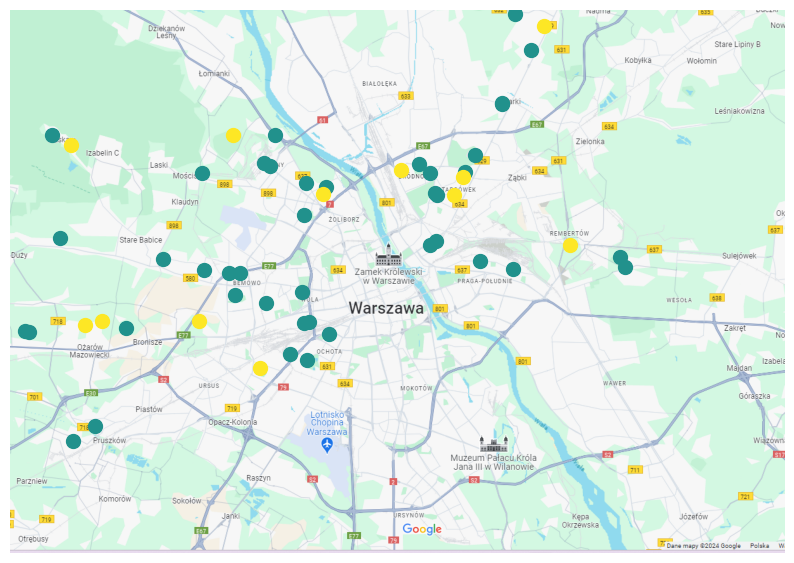

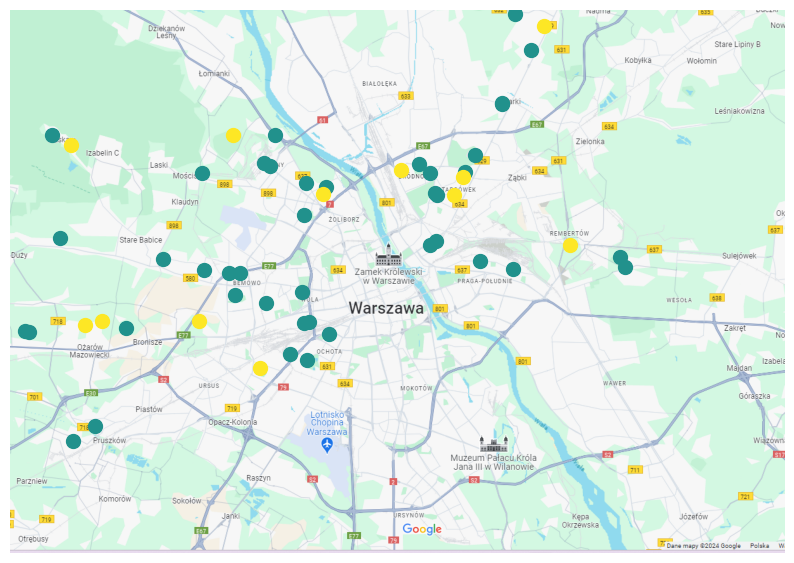

In [11]:
from Data_reading.modifying_dfs import Aliases as als

def plot_fast_lines(fast_lines):
    num_of_fast_lines = [x[0] for x in fast_lines]
    pos_of_fast_lines = positions_df[positions_df[als.LINE.value].isin(num_of_fast_lines)] 

    speed_data = speed.give_data_with_allowed_and_not_allowed_speed(pos_of_fast_lines)
    plot_points_on_map(speed_data, dot_size = 100)
    
plot_fast_lines(fast_lines_1)
plot_fast_lines(fast_lines_2)

In [ ]:
""" 
Now we are going to plot with one color bus stops around which
in radious R, over P % of speed measurements showed overspeed
And with second color these below P %
"""

